# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [ ]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
from sklearn import datasets         # For loading the iris dataset

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [ ]:
#Defines the col names for the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [ ]:
# Print dataset
type(df)

pandas.core.frame.DataFrame

In [ ]:
# Print dataset shape
print(df.shape)

(150, 5)


In [ ]:
# Print column names
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


2. Drop rows with any missing values


In [ ]:
# Drop na
drop_df = df.dropna()
drop_df.shape

(150, 5)

3. Encoding the class label categorical column: from string to num


In [ ]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
dataset = drop_df.replace({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})
dataset.head()

#Visualize the dataset
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Now the label/category is numeric


4. Discard columns that won't be used


5. Scatter plot of the data

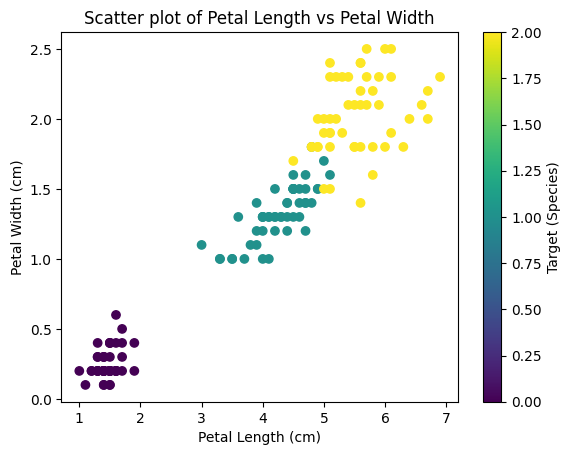

In [ ]:
plt.scatter(dataset['petal length (cm)'], dataset['petal width (cm)'], c=dataset['target'], cmap='viridis')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter plot of Petal Length vs Petal Width')

plt.colorbar(label='Target (Species)')
plt.show()

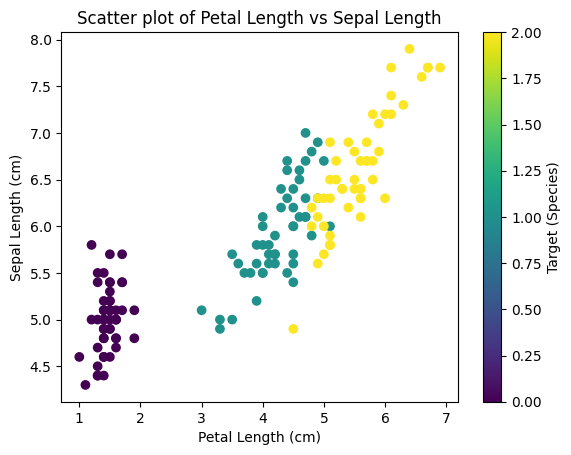

In [ ]:
# Scatter plot Petal Length vs Sepal Length
plt.scatter(dataset['petal length (cm)'], dataset['sepal length (cm)'], c=dataset['target'], cmap='viridis')

# Añadir etiquetas y título
plt.xlabel('Petal Length (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('Scatter plot of Petal Length vs Sepal Length')

# Mostrar la barra de colores para las especies
plt.colorbar(label='Target (Species)')
plt.show()


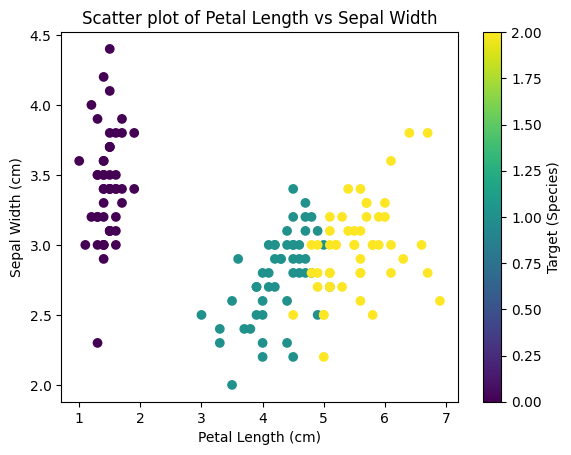

In [ ]:
# Scatter plot of Petal_Length vs Sepal_Width
plt.scatter(dataset['petal length (cm)'], dataset['sepal width (cm)'], c=dataset['target'], cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter plot of Petal Length vs Sepal Width')
plt.colorbar(label='Target (Species)')
plt.show()

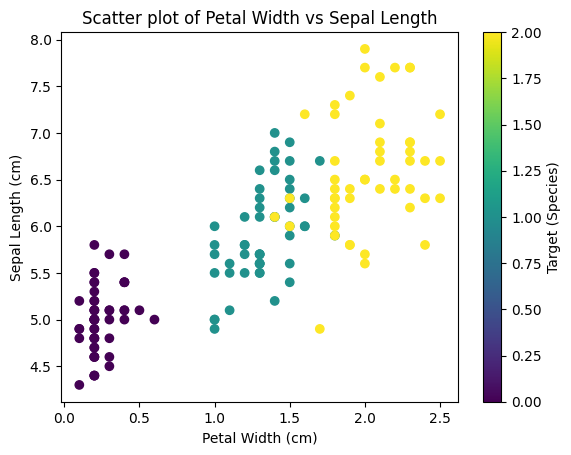

In [ ]:
# Scatter plot of Petal_Width vs Sepal_Length
plt.scatter(dataset['petal width (cm)'], dataset['sepal length (cm)'], c=dataset['target'], cmap='viridis')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('Scatter plot of Petal Width vs Sepal Length')
plt.colorbar(label='Target (Species)')
plt.show()

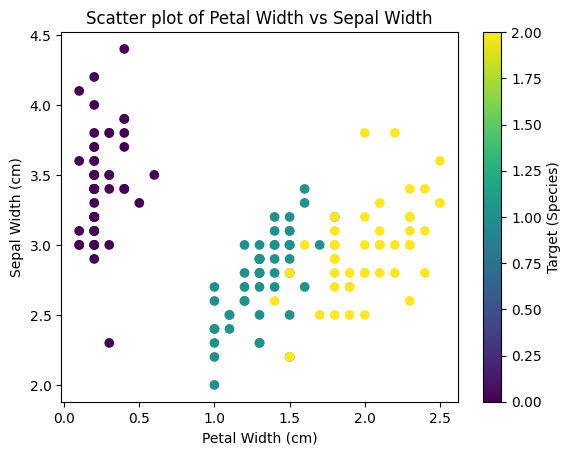

In [ ]:
# Scatter plot of Petal_Width vs Sepal_Width
plt.scatter(dataset['petal width (cm)'], dataset['sepal width (cm)'], c=dataset['target'], cmap='viridis')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter plot of Petal Width vs Sepal Width')
plt.colorbar(label='Target (Species)')
plt.show()

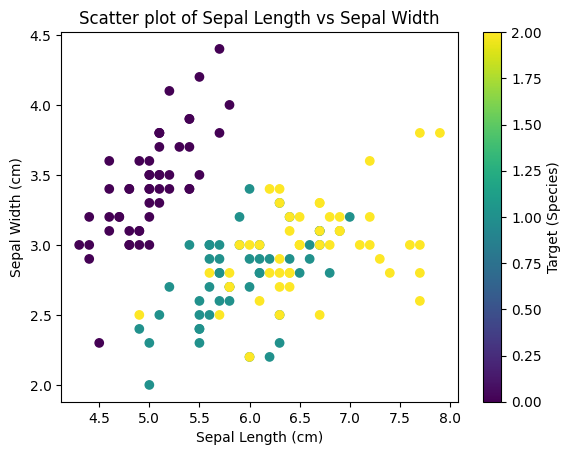

In [ ]:
# Scatter plot of Sepal_Length vs Sepal_Width
plt.scatter(dataset['sepal length (cm)'], dataset['sepal width (cm)'], c=dataset['target'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter plot of Sepal Length vs Sepal Width')
plt.colorbar(label='Target (Species)')
plt.show()

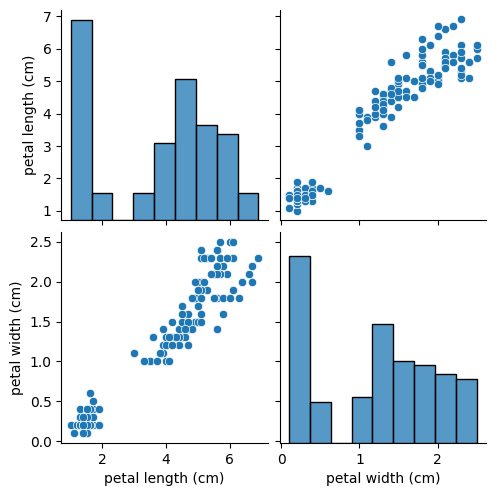

In [ ]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot(dataset.drop('target', axis=1))
plt.show()

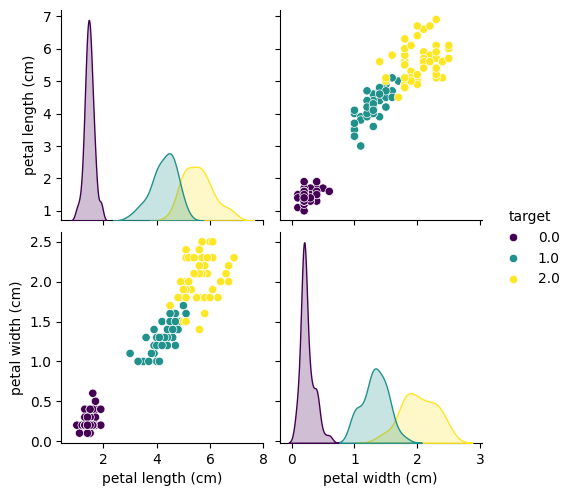

In [ ]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot(dataset, hue='target', palette='viridis')
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [ ]:
# Get dataframes for each real cluster
cluster_0 = dataset[dataset['target'] == 0]
cluster_1 = dataset[dataset['target'] == 1]
cluster_2 = dataset[dataset['target'] == 2]

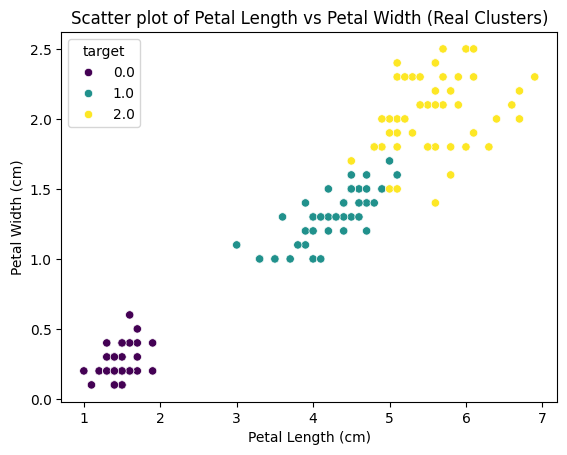

In [ ]:
# Scatter plot of each real cluster for Petal
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='target', data=dataset, palette='viridis')

# Añadir título y etiquetas
plt.title('Scatter plot of Petal Length vs Petal Width (Real Clusters)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

# Mostrar el gráfico
plt.show()

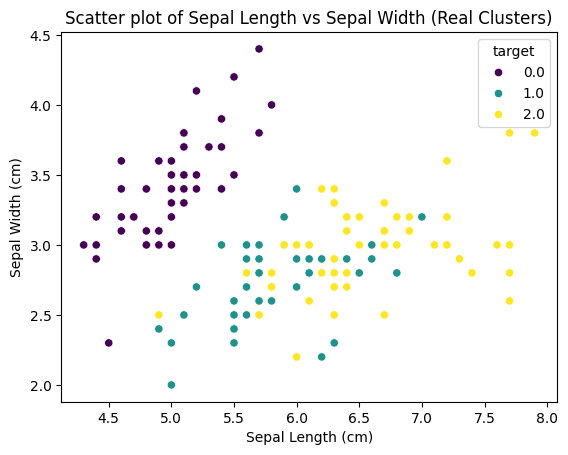

In [ ]:
# Scatter plot of each real cluster for Sepal
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', data=dataset, palette='viridis')

# Añadir título y etiquetas
plt.title('Scatter plot of Sepal Length vs Sepal Width (Real Clusters)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# Mostrar el gráfico
plt.show()

# Get variables **X** and labels **y**

In [ ]:
# Select variables (one, two, three, four)
#X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
#X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
#y  = dataset["Flower"].values

X = dataset[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]].values

# Obtener la clase de cada observación
y = dataset["target"].values


In [ ]:
# Understand the data X
print("\nLabels (x):")
print(X)


Labels (x):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]

In [ ]:
# Understand the data y
print("\nLabels (y):")
print(y)


Labels (y):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


In [ ]:
# Calculate the number of observations in the dataset
print("\nNumber of observations:", len(X))


Number of observations: 150


In [ ]:
# Calculate the number of observations for class 0
print("\nNumber of observations for class 0:", len(X[y == 0]))


Number of observations for class 0: 50


In [ ]:
# Calculate the number of observations for class 1
print("\nNumber of observations for class 1:", len(X[y == 1]))


Number of observations for class 1: 50


In [ ]:
# Calculate the number of observations for class 2
print("\nNumber of observations for class 2:", len(X[y == 2]))


Number of observations for class 2: 50


# Train a classifier

## Train the classification model

In [ ]:
# Import sklearn linear_model
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
clf = LogisticRegression()

# Fit the model to the training data
clf.fit(X, y)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predict the class of a new observation

In [ ]:
# Get a new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
#xnew = np.array([[5.5, 2.5, 3.5, 1.5]])
#xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
xnew


array([[5.5, 3.5, 1.5, 0.5]])

In [ ]:
# Make the prediction using xnew
prediction = clf.predict(xnew)

# Get the predicted class
print("\nPredicted class:")
print(prediction)



Predicted class:
[0.]


The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [ ]:
# Import sklearn train_test_split
from sklearn.model_selection import train_test_split

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Number of observations in the train set
print("\nNumber of observations in the train set:", len(X_train))




Number of observations in the train set: 120


In [ ]:
# Number of observations of each class in the train set
print("\nNumber of observations of each class in the train set:")
print(pd.Series(y_train).value_counts())


Number of observations of each class in the train set:
1.0    41
0.0    40
2.0    39
Name: count, dtype: int64


In [ ]:
# Number of observations in the test set
print("\nNumber of observations in the test set:", len(X_test))


Number of observations in the test set: 30


In [ ]:
# Number of observations of each class in the test set
print("\nNumber of observations of each class in the test set:")
print(pd.Series(y_test).value_counts())


Number of observations of each class in the test set:
2.0    11
0.0    10
1.0     9
Name: count, dtype: int64


## Train the classification model

In [ ]:
# Initialize the classifier
clf = LogisticRegression()

# Fit the model to the training data
clf.fit(X_train, y_train)

LogisticRegression()

## Test the classification model

In [ ]:
# Make the predictions using the test set
y_pred = clf.predict(X_test)

In [ ]:
# Explore real and predicted labels
print("\nReal labels:")
print(y_test)
print("\nPredicted labels:")
print(y_pred)


Real labels:
[1. 0. 2. 1. 1. 0. 1. 2. 1. 1. 2. 0. 0. 0. 0. 1. 2. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 2. 2. 0. 0.]

Predicted labels:
[1. 0. 2. 1. 1. 0. 1. 2. 1. 1. 2. 0. 0. 0. 0. 1. 2. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 2. 2. 0. 0.]


## Compute the acurracy

In [ ]:
# Define a function to compute accuracy
def accuracy(y_true, y_pred):
  total_accuracy = accuracy_score(y_true, y_pred)
  return total_accuracy

In [ ]:
# Calculate total accuracy using sklearn.metrics
from sklearn.metrics import accuracy_score
total_accuracy = accuracy_score(y_test, y_pred)
print("\nTotal accuracy:")
print(total_accuracy)


Total accuracy:
1.0


In [ ]:
# Compute accuracy for class 0
class_0_accuracy = accuracy_score(y_test[y_test == 0], y_pred[y_test == 0])
print("\nAccuracy for class 0:")
print(class_0_accuracy)


Accuracy for class 0:
1.0


In [ ]:
# Compute accuracy for class 1
class_1_accuracy = accuracy_score(y_test[y_test == 1], y_pred[y_test == 1])
print("\nAccuracy for class 1:")
print(class_1_accuracy)


Accuracy for class 1:
1.0


In [ ]:
# Compute accuracy for class 2
class_2_accuracy = accuracy_score(y_test[y_test == 2], y_pred[y_test == 2])
print("\nAccuracy for class 2:")
print(class_2_accuracy)


Accuracy for class 2:
1.0


## Confussion matrix

In [86]:
# Compute confussion matrix (normalized confusion matrix)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cmN = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

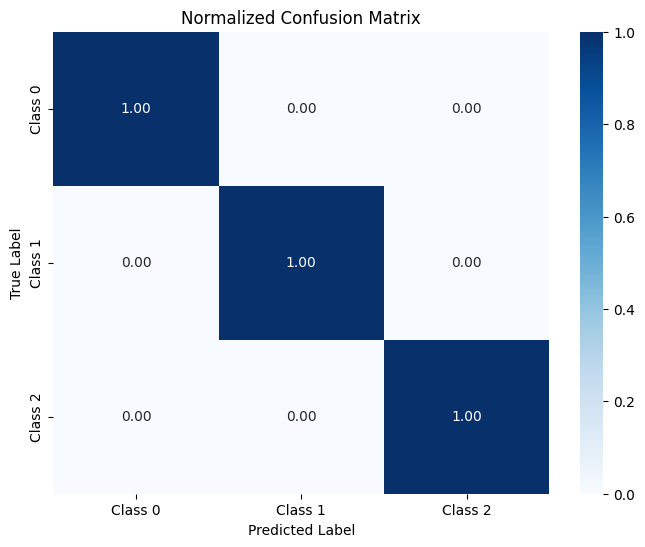

In [87]:
# Plot normalized confussion matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Normalize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmN, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?


2) Using the four variables, try with two classifiers. Which provides the best performance?

1)
La acurracy salió lo mismo en los casos presentados, pero por la cantidad de información sería lo mejor tener las cuatro variables.

2)
El performance es mejor con las 4 variables porque tiene mayor información